In [1]:
# Show sample images of HAM10000 dataset : 
#!pip install matplotlib pandas pillow

Dataset: Describe the dataset or datasets you plan to use and justify why they are appropriate to answer your question of interest. Include some visualization of the characteristics of the dataset and exploratory data analysis in Python.

The dataset we planned to use is the HAM1000 dataset provided by Kaggle. 
* The HAM10000 ("Human Against Machine with 10000 training images") dataset is collected dermatoscopic images from different populations, acquired and stored by different modalities. 
* The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. 
* The representation of diagnosis and where the researchers are able to obtained the results is explained below in data analysis report. 

We decided to use this dataset because of the extensive size of the dataset. This dataset includes 10015 images, with seven target classes for classifications. These large number of diagnosis classes will enable us to generalize our model better for the public use purpose. Moreover, since the data is standardize, we will not have to spend too much pre-processing data. This will allows us to use more time in training our model, and exploring more ways we can improve our model. Moreover, due to its standardization, there will be extensive pre-trained models that's applicable to this dataset that we can utlized. 

In [2]:
import pandas as pd
import numpy as np
import warnings 
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [3]:
from PIL import Image

def load_images_from_folder(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):  # You can add more extensions if needed
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                image_data.append(img.copy())  # Copy the image data
    return image_data


In [28]:
def load_label_from_folder(folder_path):
    label = [filename for filename in os.listdir(folder_path)]
    return label

In [4]:
import zipfile

# The name of your zip file
zip_file_name = 'HAM10000_images_part_2.zip'

# Directory name where you want to extract the contents.
# If you're extracting to the current directory, you can put '.'
extraction_path = '.'

# Check if the extraction path exists, if not, create it
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Open and extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f'Files extracted to {os.path.abspath(extraction_path)}')


Files extracted to /Users/yenle/Untitled Folder 2


In [5]:
images_path = os.path.join('/Users/yenle/Untitled Folder 2', 'HAM10000_images_part_2')
images = load_images_from_folder(images_path)

In [29]:
label = load_label_from_folder(images_path)

In [7]:
# Sample images from this dataset : 
def display_img(*args) :
    a,b,c,d = args
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

    # Display the first image on the first subplot
    axes[0,0].imshow(a)
    axes[0,0].axis('off') # Turn off the axis numbers

    # Display the second image on the second subplot
    axes[0,1].imshow(b)
    axes[0,1].axis('off') # Turn off the axis numbers

    # Display the second image on the second subplot
    axes[1,1].imshow(c)
    axes[1,1].axis('off') # Turn off the axis numbers

    # Display the second image on the second subplot
    axes[1,0].imshow(d)
    axes[1,0].axis('off') # Turn off the axis numbers

    # Show the plot
    plt.tight_layout()
    plt.show()

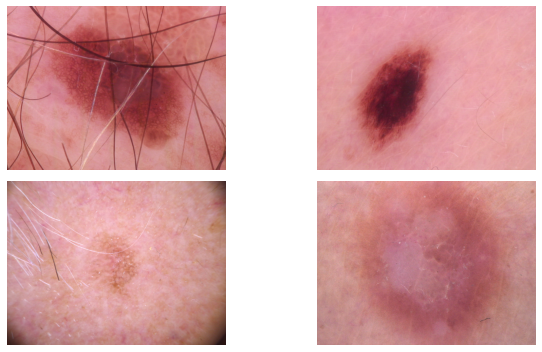

In [8]:
display_img(images[1],images[3],images[10],images[19])

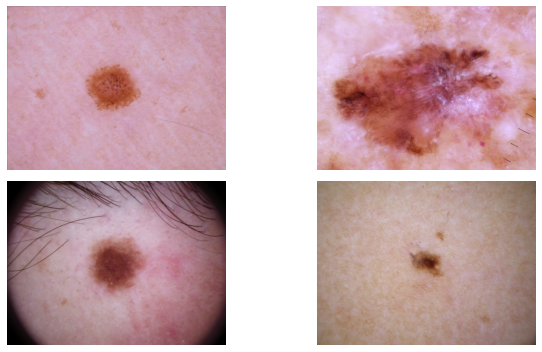

In [12]:
display_img(images[100],images[50],images[120],images[1000])

These are sample images from our data. Below will be the csv metadata file that allows us to classify images to its label and see the distribution of data in each classes. 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have loaded the metadata into a pandas DataFrame
metadata = pd.read_csv('HAM10000_metadata.csv')

# Split the data into 70% train and 30% combined validation and test
train_df, val_test_df = train_test_split(metadata, test_size=0.3, random_state=42)

# Split the combined validation and test set into half validation and half test
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=42)

# Now you have 70% of your data in train_df, 15% in val_df, and 15% in test_df


/Users/yenle/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
metadata.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [41]:
grouped = metadata.groupby('dx')['image_id'].apply(list).reset_index()
grouped

,dx,image_id
0,akiec,"[ISIC_0029417, ISIC_0029915, ISIC_0029360, ISI..."
1,bcc,"[ISIC_0028155, ISIC_0034093, ISIC_0029230, ISI..."
2,bkl,"[ISIC_0027419, ISIC_0025030, ISIC_0026769, ISI..."
3,df,"[ISIC_0027008, ISIC_0028790, ISIC_0028880, ISI..."
4,mel,"[ISIC_0025964, ISIC_0030623, ISIC_0027190, ISI..."
5,nv,"[ISIC_0024698, ISIC_0024693, ISIC_0032212, ISI..."
6,vasc,"[ISIC_0031197, ISIC_0031270, ISIC_0029486, ISI..."


In [14]:
metadata.rename(columns={
    'dx': 'Diagnosis',
    'dx_type': 'Lession Confirmation'
})


,lesion_id,image_id,Diagnosis,Lession Confirmation,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


Diagnostic categories in the realm of pigmented lesions: 
* 1. Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
*  2. basal cell carcinoma (bcc)
* 3. benign keratosis-like lesions (solar lentigines / seborrheic keratoseslichen-planus like keratoses, bkl)
* 4. dermatofibroma (df)
*  5. melanoma (mel)
*  6. melanocytic nevi (nv) 
*  7. vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

In [11]:
metadata['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

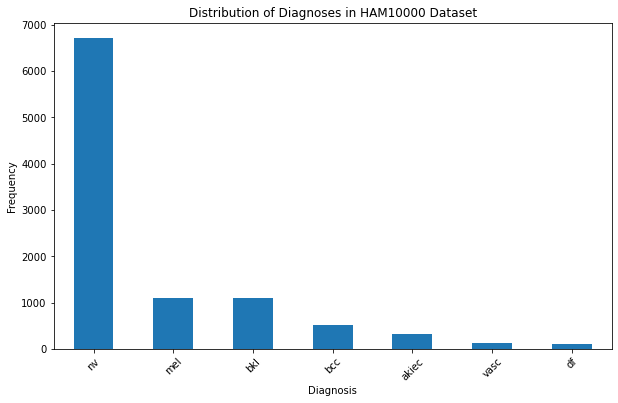

In [15]:
# Count the frequency of each unique value in the 'dx' column
diagnosis_counts = metadata['dx'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar')
plt.title('Distribution of Diagnoses in HAM10000 Dataset')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels to show them more clearly
plt.show()

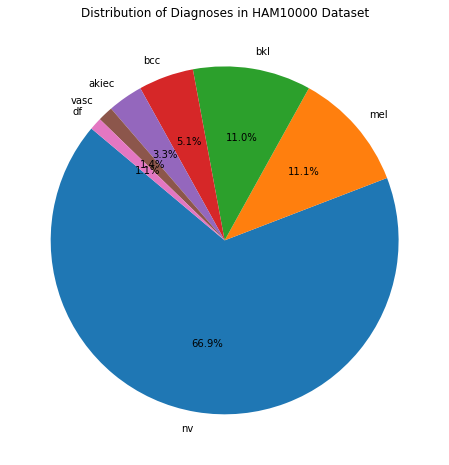

In [16]:
# Create a pie chart
plt.figure(figsize=(8, 8))
diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnoses in HAM10000 Dataset')
plt.ylabel('')  # Hide the y-label since it's not useful here
plt.show()


Lesion Confirmation : histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal).


In [17]:
metadata['dx_type'].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

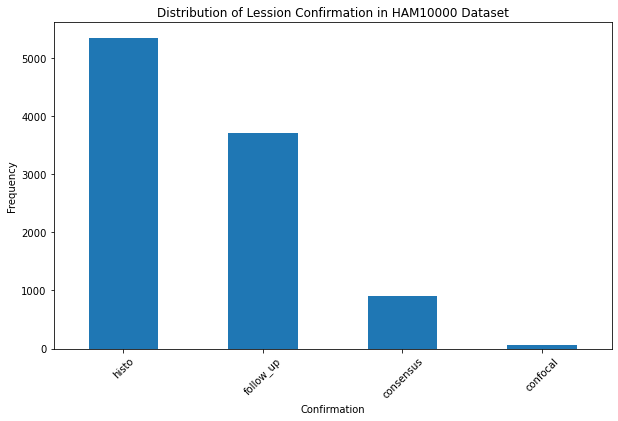

In [18]:
# Count the frequency of each unique value in the 'dx' column
diagnosis_counts = metadata['dx_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar')
plt.title('Distribution of Lession Confirmation in HAM10000 Dataset')
plt.xlabel('Confirmation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels to show them more clearly
plt.show()

In [19]:
print('The age range for this data is : ', min (metadata['age']), max(metadata['age']))

The age range for this data is :  0.0 85.0


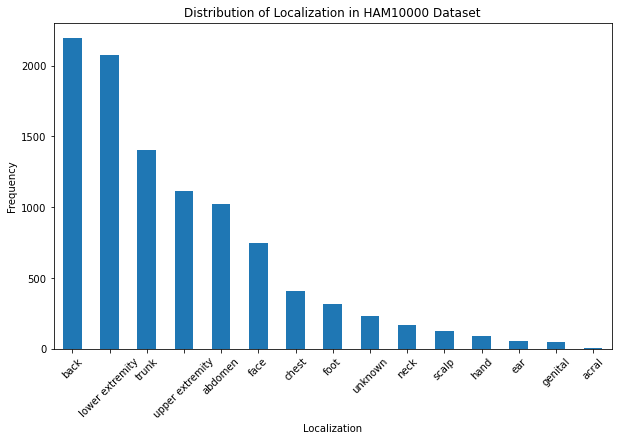

In [20]:
# Count the frequency of each unique value in the 'Localization' column
diagnosis_counts = metadata['localization'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar')
plt.title('Distribution of Localization in HAM10000 Dataset')
plt.xlabel('Localization')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels to show them more clearly
plt.show()


We can see that our data is very diverse, there's some class balance we have to take into acocunt. However, we can still develop way to normalize our data or data agumentation further on! 

In [22]:
#!pip install pyppeteer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 876.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.5 MB/s eta 0:00:00a 0:00:01
